# Probability  & Statistics 2

# Example 1: Make a bar chart (histogram) from discrete data;

Suppose the following data represents new members at a gym. Use a bar chart (histogram) to represent this data
`{'children':100,'adults':135,'seniors':88}`

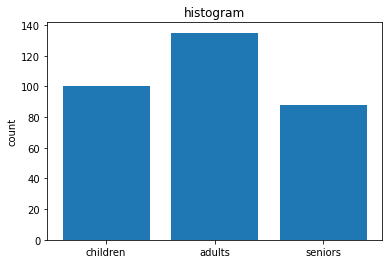

In [1]:
import matplotlib.pyplot as plt
D = {'children':100,'adults':135,'seniors':88}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.ylabel('count')
plt.title('histogram')
plt.show()

# Example 2: Histograms from continuous data

The following link provides house prices of homes sold in Iowa. Make both a histogram that features the count of each element, and a normalized histogram that features the probability of each price range. It should look like this;

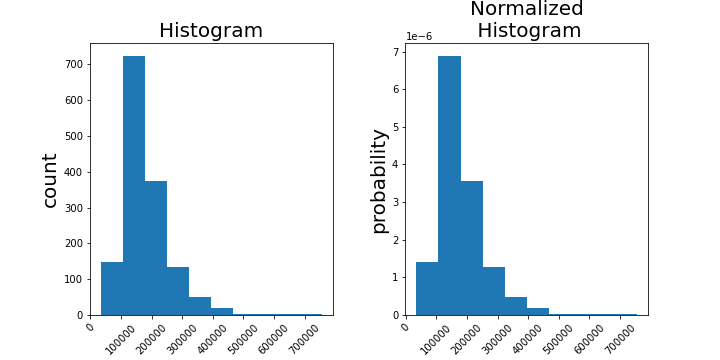

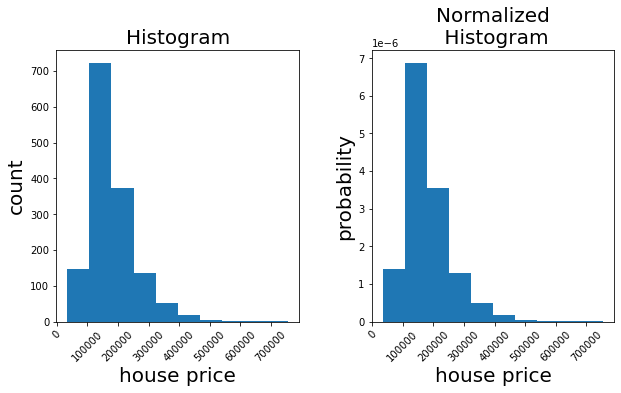

In [188]:
import matplotlib.pyplot as plt
import pandas as pd
link = 'https://raw.githubusercontent.com/JoeGanser/Regression_Teaching_Tutorial/master/AMES_Regression_Files/train.csv'

df = pd.read_csv(link)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Histogram',fontsize=20)
plt.hist(df['SalePrice'])
plt.xlabel('house price',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Normalized\n Histogram',fontsize=20)
plt.hist(df['SalePrice'], density=True)
plt.xlabel('house price',fontsize=20)
plt.ylabel('probability',fontsize=20)
plt.xticks(rotation=45)

plt.subplots_adjust(wspace=0.3)
plt.show()

# Example 3: Binomial distrbition

Use the scipy package to calculate the probability of getting at most 2 heads out of 3 coin tosses.

This is equivalent to `p(0 heads)+p(1 head)+p(2 heads)=0.875`

In [64]:
from scipy.stats import binom
n = 3 
p = 0.5 
prob = [binom.pmf(t, n, p) for t in range(n+1) ]
# printing the table
print("tosses\tp(heads)")
for toss in range(n+1):
    print(str(toss) + "\t" + str(prob[toss]))

P = prob[0]+prob[1]+prob[2]
print('\n P: {}'.format(P))

tosses	p(heads)
0	0.125
1	0.3750000000000001
2	0.3750000000000001
3	0.125

 P: 0.8750000000000002


# Example 4: Plotting the binomial distribution using the probability mass function

Use matplotlib to plot the probabilities of example 3 into a bar chart. 

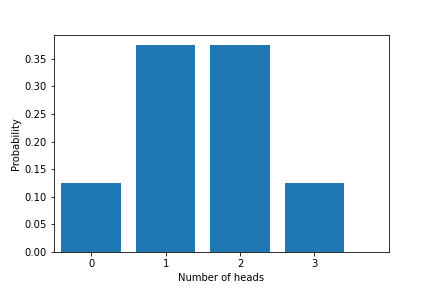

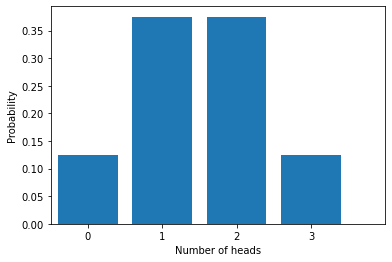

In [181]:
from scipy.stats import binom
import matplotlib.pyplot as plt

n = 3 
p = 0.5 
prob = [binom.pmf(t, n, p) for t in range(n+1)]
plt.bar(range(n+1), prob)
plt.xlim(-0.5,4)
plt.xticks([0,1,2,3])
plt.xlabel('Number of heads')
plt.ylabel('Probability')
plt.savefig('example4.png')
plt.show()

# Example 5: Make a Gaussian distribution plot like the IQ test example. It should look like this. We want to shade our area of interest (within 1 standard deviation of the mean).

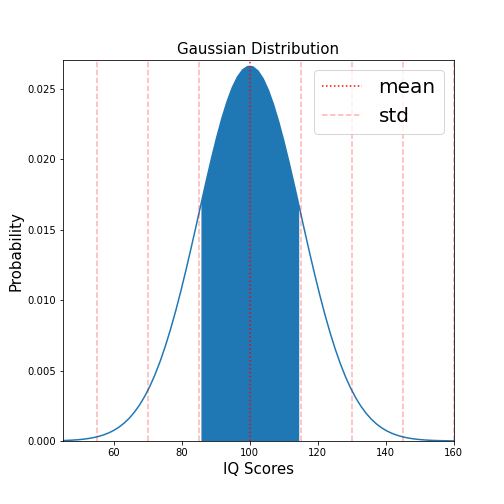

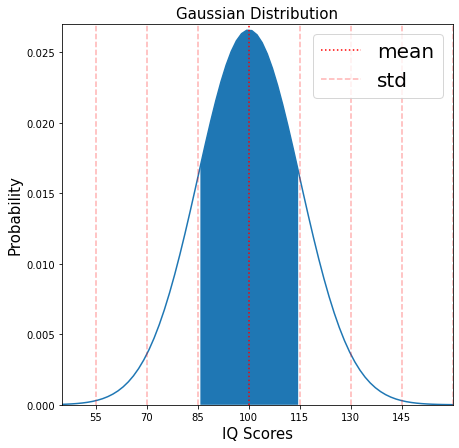

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

mu = 100
std = 15
snd = stats.norm(mu, std)
#snd = stats.t(mu, std)
x = np.linspace(10, 160, 100)
plt.figure(figsize=(7,7))
plt.plot(x, snd.pdf(x))
for iq in [55,70,85,100,115,130,145,160]:
    if iq==100:
        plt.axvline(iq,label='mean',color='red',linestyle=':',alpha=1)
    elif iq==115:
        plt.axvline(iq,label='std',color='red',linestyle='--',alpha=0.3)
    else:
        plt.axvline(iq,color='red',linestyle='--',alpha=0.3)
plt.xlim(45, 160)
plt.ylim(0,0.027)
plt.xticks([55,70,85,100,115,130,145])
plt.title('Gaussian Distribution', fontsize='15')
plt.xlabel('IQ Scores', fontsize='15')
plt.ylabel('Probability', fontsize='15')
section = [j for j in x if j>=85 and j<=115]
plt.fill_between(section,snd.pdf(section))
plt.legend(fontsize=20)
#plt.savefig('example5.png')
plt.show()

# Example 6: Find use both the cumulative distribution function to find the probability of an IQ being between 85 to 115 (within 1 standard deviation).

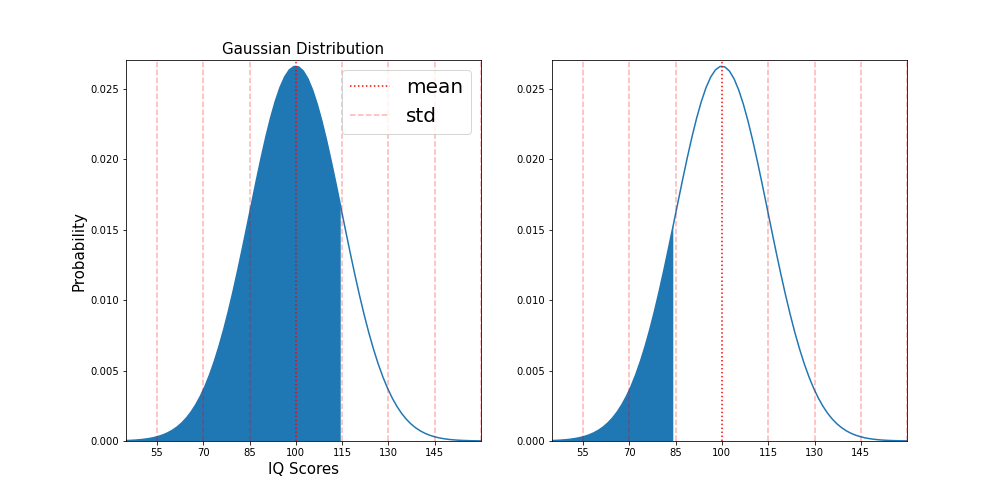

In [186]:
from scipy.stats import norm
mean=100
sd=15
P = norm.cdf(mean+sd,loc=mean,scale=sd)-norm.cdf(mean-sd,loc=mean,scale=sd)
print('P: {}'.format(P))

P: 0.6826894921370859


# Example 7: Use the bootstrapping and the central limit theorem to build the graphic shown below;

`data=random.sample(range(0,100),100)`

* Make each sample size `50`
* Make plots for `50,500,1000` resamples.

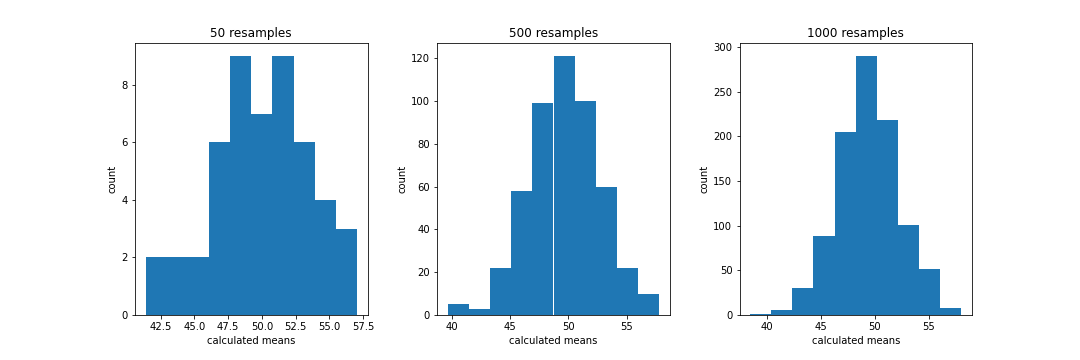

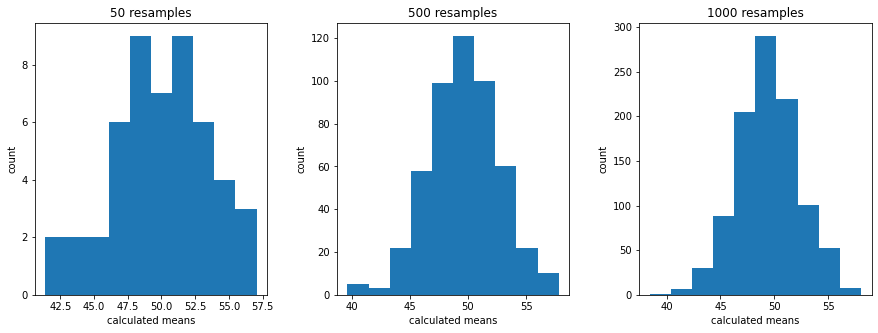

In [187]:
import numpy as np
import random

data = random.sample(range(0,100),100)

def sampling(N):
    means = []
    for i in range(N):
        s = random.sample(data,50)
        means.append(np.mean(s))
    return means

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(sampling(50))
plt.title('50 resamples')
plt.xlabel('calculated means')
plt.ylabel('count')

plt.subplot(1,3,2)
plt.hist(sampling(500))
plt.title('500 resamples')
plt.xlabel('calculated means')
plt.ylabel('count')


plt.subplot(1,3,3)
plt.hist(sampling(1000))
plt.title('1000 resamples')
plt.xlabel('calculated means')
plt.ylabel('count')
plt.subplots_adjust(wspace=0.3)
plt.show()